#Punto 1 – Solución Sugerida



In [1]:
if (!require('caret')) install.packages('caret')
if (!require('MLmetrics')) install.packages('MLmetrics')
if (!require('e1071')) install.packages('e1071')

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: MLmetrics

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘MLmetrics’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’


Loading required package: e1071



In [2]:
library(readxl)
library(caret)
library(MLmetrics)
library(ROCR)
library(e1071)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘MLmetrics’


The following objects are masked from ‘package:caret’:

    MAE, RMSE


The following object is masked from ‘package:base’:

    Recall




In [3]:
set.seed(1234)
df <- read_excel('gifts_historico.xlsx')
str(df)

tibble [249 × 16] (S3: tbl_df/tbl/data.frame)
 $ Id                      : num [1:249] 46314 46448 46732 46882 47001 ...
 $ genero                  : chr [1:249] "M" "M" "M" "Nina" ...
 $ edad                    : num [1:249] 17 16 18 13 12 7 18 9 17 5 ...
 $ comportamiento_escolar  : chr [1:249] "ALTO" "MEDIO" "ALTO" "ALTO" ...
 $ Obediencia_hogar        : num [1:249] 1 5 3 6 7 5 6 9 2 2 ...
 $ Intereses               : chr [1:249] "Video Juegos" "Video Juegos" "Video Juegos" "Juegos de Mesa" ...
 $ Socioeconomía           : num [1:249] 4 3 1 6 3 3 1 1 1 3 ...
 $ Actividades_comunitarias: chr [1:249] "No" "Si" "No" "No" ...
 $ Num_hermanos            : num [1:249] 1 5 5 2 4 3 0 4 5 2 ...
 $ Vivienda                : chr [1:249] "RURAL" "URBANA" "RURAL" "RURAL" ...
 $ Estado_Salud            : chr [1:249] "BAJO" "BAJO" "BAJO" "REGULAR" ...
 $ Religion_Familiar       : chr [1:249] "Catolicismo Romano" "Cristianismo" "Cristianismo" "Catolicismo Romano" ...
 $ Actividades_deportivas  : nu

In [4]:
# Eliminar variable no necesaria
df_1 <- df[ , -c(1)]
str(df_1)

tibble [249 × 15] (S3: tbl_df/tbl/data.frame)
 $ genero                  : chr [1:249] "M" "M" "M" "Nina" ...
 $ edad                    : num [1:249] 17 16 18 13 12 7 18 9 17 5 ...
 $ comportamiento_escolar  : chr [1:249] "ALTO" "MEDIO" "ALTO" "ALTO" ...
 $ Obediencia_hogar        : num [1:249] 1 5 3 6 7 5 6 9 2 2 ...
 $ Intereses               : chr [1:249] "Video Juegos" "Video Juegos" "Video Juegos" "Juegos de Mesa" ...
 $ Socioeconomía           : num [1:249] 4 3 1 6 3 3 1 1 1 3 ...
 $ Actividades_comunitarias: chr [1:249] "No" "Si" "No" "No" ...
 $ Num_hermanos            : num [1:249] 1 5 5 2 4 3 0 4 5 2 ...
 $ Vivienda                : chr [1:249] "RURAL" "URBANA" "RURAL" "RURAL" ...
 $ Estado_Salud            : chr [1:249] "BAJO" "BAJO" "BAJO" "REGULAR" ...
 $ Religion_Familiar       : chr [1:249] "Catolicismo Romano" "Cristianismo" "Cristianismo" "Catolicismo Romano" ...
 $ Actividades_deportivas  : num [1:249] 1 1 0 0 0 0 1 1 0 0 ...
 $ Actividades_atrísticas  : num [1:249] 

In [5]:
#Convierte las categorías a números
df_1$reciberegalo <- as.factor(df_1$reciberegalo)
df_1$genero <- as.factor(df_1$genero)
df_1$Intereses <- as.factor(df_1$Intereses )
df_1$comportamiento_escolar <- as.factor(df_1$comportamiento_escolar)
df_1$Vivienda <- as.factor(df_1$Vivienda)
df_1$Actividades_comunitarias <- as.factor(df_1$Actividades_comunitarias)
df_1$Estado_Salud <- as.factor(df_1$Estado_Salud)
df_1$Religion_Familiar <- as.factor(df_1$Religion_Familiar)
str(df_1)

tibble [249 × 15] (S3: tbl_df/tbl/data.frame)
 $ genero                  : Factor w/ 4 levels "F","M","Nina",..: 2 2 2 3 2 1 2 2 2 3 ...
 $ edad                    : num [1:249] 17 16 18 13 12 7 18 9 17 5 ...
 $ comportamiento_escolar  : Factor w/ 3 levels "ALTO","BAJO",..: 1 3 1 1 1 1 1 2 1 1 ...
 $ Obediencia_hogar        : num [1:249] 1 5 3 6 7 5 6 9 2 2 ...
 $ Intereses               : Factor w/ 4 levels "Juegos al aire libre",..: 4 4 4 2 4 2 4 4 4 3 ...
 $ Socioeconomía           : num [1:249] 4 3 1 6 3 3 1 1 1 3 ...
 $ Actividades_comunitarias: Factor w/ 5 levels "No","No realizo",..: 1 4 1 1 1 1 1 5 1 1 ...
 $ Num_hermanos            : num [1:249] 1 5 5 2 4 3 0 4 5 2 ...
 $ Vivienda                : Factor w/ 2 levels "RURAL","URBANA": 1 2 1 1 1 2 1 2 2 1 ...
 $ Estado_Salud            : Factor w/ 4 levels "BAJO","ÓPTIMO",..: 1 1 1 4 1 4 1 2 1 4 ...
 $ Religion_Familiar       : Factor w/ 4 levels "Catolicismo Romano",..: 1 2 2 1 4 2 4 2 2 2 ...
 $ Actividades_deportivas  : num [

In [6]:
# Codifica varibles categóricas
df_2<-dummyVars("~.",data=df_1)
df_3<-as.data.frame(predict(df_2,newdata=df_1))
df_4<-within(df_3,rm(genero.F, comportamiento_escolar.ALTO, "Intereses.Juegos de Mesa", Actividades_comunitarias.No,
                    Vivienda.RURAL, Estado_Salud.BAJO, Religion_Familiar.Cristianismo))
df_4$reciberegalo<-as.factor(df_4$reciberegalo.1)
str(df_4)

'data.frame':	249 obs. of  29 variables:
 $ genero.M                                : num  1 1 1 0 1 0 1 1 1 0 ...
 $ genero.Nina                             : num  0 0 0 1 0 0 0 0 0 1 ...
 $ genero.Nino                             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ edad                                    : num  17 16 18 13 12 7 18 9 17 5 ...
 $ comportamiento_escolar.BAJO             : num  0 0 0 0 0 0 0 1 0 0 ...
 $ comportamiento_escolar.MEDIO            : num  0 1 0 0 0 0 0 0 0 0 ...
 $ Obediencia_hogar                        : num  1 5 3 6 7 5 6 9 2 2 ...
 $ Intereses.Juegos al aire libre          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Intereses.Muñecos/Muñecas               : num  0 0 0 0 0 0 0 0 0 1 ...
 $ Intereses.Video Juegos                  : num  1 1 1 0 1 0 1 1 1 0 ...
 $ Socioeconomía                           : num  4 3 1 6 3 3 1 1 1 3 ...
 $ Actividades_comunitarias.No realizo     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Actividades_comunitarias.Realizo Algunas: num  0 0 0 0 0 0 0 

In [7]:
df_final <- df_4[ , -c(27, 28)]
str(df_final)

'data.frame':	249 obs. of  27 variables:
 $ genero.M                                : num  1 1 1 0 1 0 1 1 1 0 ...
 $ genero.Nina                             : num  0 0 0 1 0 0 0 0 0 1 ...
 $ genero.Nino                             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ edad                                    : num  17 16 18 13 12 7 18 9 17 5 ...
 $ comportamiento_escolar.BAJO             : num  0 0 0 0 0 0 0 1 0 0 ...
 $ comportamiento_escolar.MEDIO            : num  0 1 0 0 0 0 0 0 0 0 ...
 $ Obediencia_hogar                        : num  1 5 3 6 7 5 6 9 2 2 ...
 $ Intereses.Juegos al aire libre          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Intereses.Muñecos/Muñecas               : num  0 0 0 0 0 0 0 0 0 1 ...
 $ Intereses.Video Juegos                  : num  1 1 1 0 1 0 1 1 1 0 ...
 $ Socioeconomía                           : num  4 3 1 6 3 3 1 1 1 3 ...
 $ Actividades_comunitarias.No realizo     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Actividades_comunitarias.Realizo Algunas: num  0 0 0 0 0 0 0 

In [8]:
colnames(df_final)[8]<-"Intereses.Juegos_aire_libre"
colnames(df_final)[9]<-"Intereses.Munecos_Munecas"
colnames(df_final)[10]<-"Intereses.VideoJuegos"
colnames(df_final)[12]<-"Actividades_comunitarias.No_realizo"
colnames(df_final)[13]<-"Actividades_comunitarias.Realizo_Algunas"
colnames(df_final)[15]<-"Actividades_comunitarias.Si_realizo"
colnames(df_final)[21]<-"Religion_Familiar.Catolicismo"
colnames(df_final)[22]<-"Religion_Familiar.Musulmana"
str(df_final)

'data.frame':	249 obs. of  27 variables:
 $ genero.M                                : num  1 1 1 0 1 0 1 1 1 0 ...
 $ genero.Nina                             : num  0 0 0 1 0 0 0 0 0 1 ...
 $ genero.Nino                             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ edad                                    : num  17 16 18 13 12 7 18 9 17 5 ...
 $ comportamiento_escolar.BAJO             : num  0 0 0 0 0 0 0 1 0 0 ...
 $ comportamiento_escolar.MEDIO            : num  0 1 0 0 0 0 0 0 0 0 ...
 $ Obediencia_hogar                        : num  1 5 3 6 7 5 6 9 2 2 ...
 $ Intereses.Juegos_aire_libre             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Intereses.Munecos_Munecas               : num  0 0 0 0 0 0 0 0 0 1 ...
 $ Intereses.VideoJuegos                   : num  1 1 1 0 1 0 1 1 1 0 ...
 $ Socioeconomía                           : num  4 3 1 6 3 3 1 1 1 3 ...
 $ Actividades_comunitarias.No_realizo     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Actividades_comunitarias.Realizo_Algunas: num  0 0 0 0 0 0 0 

,genero.M,genero.Nina,genero.Nino,edad,comportamiento_escolar.BAJO,comportamiento_escolar.MEDIO,Obediencia_hogar,Intereses.Juegos_aire_libre,Intereses.Munecos_Munecas,Intereses.VideoJuegos,⋯,Estado_Salud.ÓPTIMO,Estado_Salud.REGUAR,Estado_Salud.REGULAR,Religion_Familiar.Catolicismo,Religion_Familiar.Musulmana,Religion_Familiar.Protestantismo,Actividades_deportivas,Actividades_atrísticas,Aptitudes_científicas,reciberegalo
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,0,0,17,0,0,1,0,0,1,⋯,0,0,0,1,0,0,1,0,0,0
2,1,0,0,16,0,1,5,0,0,1,⋯,0,0,0,0,0,0,1,0,0,0
3,1,0,0,18,0,0,3,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
4,0,1,0,13,0,0,6,0,0,0,⋯,0,0,1,1,0,0,0,1,1,0
5,1,0,0,12,0,0,7,0,0,1,⋯,0,0,0,0,0,1,0,1,0,1
6,0,0,0,7,0,0,5,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0


k-Nearest Neighbors 

174 samples
 26 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 139, 139, 139, 140, 139 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9371429  0.8252731
   2  0.9485714  0.8558652
   3  0.9369748  0.8248033
   4  0.9428571  0.8432284
   5  0.9485714  0.8567954
   6  0.9426891  0.8411272
   7  0.9428571  0.8371551
   8  0.9484034  0.8537450
   9  0.9542857  0.8694132
  10  0.9541176  0.8681780
  11  0.9541176  0.8681780
  12  0.9484034  0.8537450
  13  0.9482353  0.8513103
  14  0.9484034  0.8526569
  15  0.9598319  0.8878182
  16  0.9425210  0.8357892
  17  0.9541176  0.8722972
  18  0.9368067  0.8212100
  19  0.9368067  0.8212100
  20  0.9368067  0.8212100
  21  0.9368067  0.8212100
  22  0.9312605  0.7997208
  23  0.9369748  0.8193611
  24  0.9310924  0.8015697
  25  0.9310924  0.8015697
  26  0.9196639  0.7638278
  27  0.9196639  0.7647515
  28  0.9310924  0.8

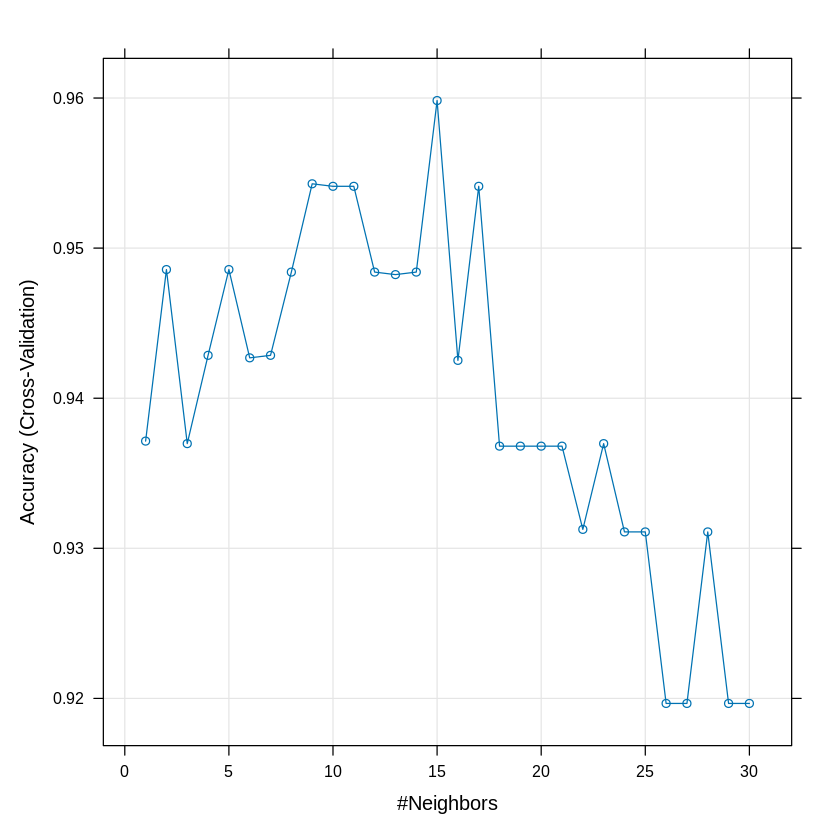

In [9]:
#Parte el conjunto de datos a 70 y 30
set.seed(1234)
head(df_final)
sample <- sample.int(nrow(df_final), floor(0.70 * nrow(df_final)))
train_data <- df_final[sample, ]
test_data <- df_final[-sample, ]

# Utiliza validación cruzada
cross <- trainControl(method = "cv", number = 5)
modeloknn <- train(
  reciberegalo ~ .,
  data = train_data,
  method = "knn",
  tuneGrid = expand.grid(k = 1:30),
  trControl = cross,
  metric = "Accuracy"
)

# Resumen del modelo
modeloknn
plot(modeloknn)

**1)** Si bien se nos dice que el mejor valor para K es k = 26 con un accuracy de 0.7473, podemos ver que en términos de accuracy y con una menor cantidad de de vecinos, k = 15 posee un accuracy del 0.7470 (diferencia mínima en accuracy a comparación del anterior) y utilizando 11 vecinos menos.

# Modelo Base

Utilizamos un valor intermedio que ofrezca un alto accuracy.  Según la gráfica anterior, puede ser K = 16

In [10]:
# MODELO CON K = 16 - BASE
set.seed(1234)
test_pred = knn3(reciberegalo ~. ,  data=train_data, k = 16)
# Desempeño en entrenamiento.
print("ENTRENAMIENTO")
predmod <- predict(test_pred, train_data, type = "prob")
pronknn<-ifelse(predmod[,2] > 0.3 ,1, 0)
confusionMatrix(as.factor(pronknn), train_data$reciberegalo, positive = "1")
# Desempeño en prueba.
print("PRUEBA")
predmod <- predict(test_pred, test_data, type = "prob")
pronknn<-ifelse(predmod[,2] > 0.3 ,1, 0)
confusionMatrix(as.factor(pronknn), test_data$reciberegalo, positive = "1")

[1] "ENTRENAMIENTO"


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 126   2
         1   1  45
                                          
               Accuracy : 0.9828          
                 95% CI : (0.9504, 0.9964)
    No Information Rate : 0.7299          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.956           
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9574          
            Specificity : 0.9921          
         Pos Pred Value : 0.9783          
         Neg Pred Value : 0.9844          
             Prevalence : 0.2701          
         Detection Rate : 0.2586          
   Detection Prevalence : 0.2644          
      Balanced Accuracy : 0.9748          
                                          
       'Positive' Class : 1               
                              

[1] "PRUEBA"


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 59  1
         1  2 13
                                          
               Accuracy : 0.96            
                 95% CI : (0.8875, 0.9917)
    No Information Rate : 0.8133          
    P-Value [Acc > NIR] : 0.0001827       
                                          
                  Kappa : 0.8718          
                                          
 Mcnemar's Test P-Value : 1.0000000       
                                          
            Sensitivity : 0.9286          
            Specificity : 0.9672          
         Pos Pred Value : 0.8667          
         Neg Pred Value : 0.9833          
             Prevalence : 0.1867          
         Detection Rate : 0.1733          
   Detection Prevalence : 0.2000          
      Balanced Accuracy : 0.9479          
                                          
       'Positive' Class : 1               
                                    

# Modelo con Overfitting

Para demostrar un sobre-ajuste, utilizamos un valor pequeño de K, por ejemplo K = 1

In [11]:
# MODELO CON K = 1  - OVERFITTING
set.seed(1234)
test_pred = knn3(reciberegalo~., data=train_data, k = 1)
# Desempeño en entrenamiento.
print("ENTRENAMIENTO")
predmod <- predict(test_pred, train_data, type = "prob")
pronknn<-ifelse(predmod[,2] > 0.3 ,1, 0)
confusionMatrix(as.factor(pronknn), train_data$reciberegalo, positive = "1")
# Desempeño en prueba.
print("PRUEBA")
predmod <- predict(test_pred, test_data, type = "prob")
pronknn<-ifelse(predmod[,2] > 0.3 ,1, 0)
confusionMatrix(as.factor(pronknn), test_data$reciberegalo, positive = "1")

[1] "ENTRENAMIENTO"


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 127   0
         1   0  47
                                    
               Accuracy : 1         
                 95% CI : (0.979, 1)
    No Information Rate : 0.7299    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.2701    
         Detection Rate : 0.2701    
   Detection Prevalence : 0.2701    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : 1         
                                    

[1] "PRUEBA"


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 59  2
         1  2 12
                                         
               Accuracy : 0.9467         
                 95% CI : (0.869, 0.9853)
    No Information Rate : 0.8133         
    P-Value [Acc > NIR] : 0.0008108      
                                         
                  Kappa : 0.8244         
                                         
 Mcnemar's Test P-Value : 1.0000000      
                                         
            Sensitivity : 0.8571         
            Specificity : 0.9672         
         Pos Pred Value : 0.8571         
         Neg Pred Value : 0.9672         
             Prevalence : 0.1867         
         Detection Rate : 0.1600         
   Detection Prevalence : 0.1867         
      Balanced Accuracy : 0.9122         
                                         
       'Positive' Class : 1              
                                         

El modelo base muestra un accuracy de 0.9828 en Entrenamiento y 0.96 en Prueba.  El nuevo modelo muestra un accuracy de 1 en Entrenamiento (**mejora**), y 0.9467 en Prueba (**empeora**), mostrano un claro sobre-ajuste

# Modelo con Underfitting

Para demostrar un sobre-ajuste, utilizamos un valor grande de K, por ejemplo K = 50

In [12]:
# MODELO CON K = 50  - UNDERFITTING
set.seed(1234)
test_pred = knn3(reciberegalo~., data=train_data, k = 50)
# Desempeño en entrenamiento.
print("ENTRENAMIENTO")
predmod <- predict(test_pred, train_data, type = "prob")
pronknn<-ifelse(predmod[,2] > 0.3 ,1, 0)
confusionMatrix(as.factor(pronknn), train_data$reciberegalo, positive = "1")
# Desempeño en prueba.
print("PRUEBA")
predmod <- predict(test_pred, test_data, type = "prob")
pronknn<-ifelse(predmod[,2] > 0.3 ,1, 0)
confusionMatrix(as.factor(pronknn), test_data$reciberegalo, positive = "1")

[1] "ENTRENAMIENTO"


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 118   1
         1   9  46
                                          
               Accuracy : 0.9425          
                 95% CI : (0.8968, 0.9721)
    No Information Rate : 0.7299          
    P-Value [Acc > NIR] : 4.972e-13       
                                          
                  Kappa : 0.8617          
                                          
 Mcnemar's Test P-Value : 0.02686         
                                          
            Sensitivity : 0.9787          
            Specificity : 0.9291          
         Pos Pred Value : 0.8364          
         Neg Pred Value : 0.9916          
             Prevalence : 0.2701          
         Detection Rate : 0.2644          
   Detection Prevalence : 0.3161          
      Balanced Accuracy : 0.9539          
                                          
       'Positive' Class : 1               
                              

[1] "PRUEBA"


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 55  1
         1  6 13
                                          
               Accuracy : 0.9067          
                 95% CI : (0.8171, 0.9616)
    No Information Rate : 0.8133          
    P-Value [Acc > NIR] : 0.02074         
                                          
                  Kappa : 0.7298          
                                          
 Mcnemar's Test P-Value : 0.13057         
                                          
            Sensitivity : 0.9286          
            Specificity : 0.9016          
         Pos Pred Value : 0.6842          
         Neg Pred Value : 0.9821          
             Prevalence : 0.1867          
         Detection Rate : 0.1733          
   Detection Prevalence : 0.2533          
      Balanced Accuracy : 0.9151          
                                          
       'Positive' Class : 1               
                                    

El modelo base muestra un accuracy de 0.9828 en Entrenamiento y 0.96 en Prueba.  Este último modelo muestra un accuracy de 0.9425 en Entrenamiento (**empeora**), y 0.9067 en Prueba (**empeora**) , mostrano un claro sub-ajuste

# PUNTO 3 CURVA ROC

Resultados para umbral de probabilidad = 1 :
          Reference
Prediction  0  1
         0 61 14
         1  0  0
Resultados para umbral de probabilidad = 0.9 :
          Reference
Prediction  0  1
         0 61 14
         1  0  0
Resultados para umbral de probabilidad = 0.8 :
          Reference
Prediction  0  1
         0 61 14
         1  0  0
Resultados para umbral de probabilidad = 0.7 :
          Reference
Prediction  0  1
         0 61 14
         1  0  0
Resultados para umbral de probabilidad = 0.6 :
          Reference
Prediction  0  1
         0 61 11
         1  0  3
Resultados para umbral de probabilidad = 0.5 :
          Reference
Prediction  0  1
         0 61  8
         1  0  6
Resultados para umbral de probabilidad = 0.4 :
          Reference
Prediction  0  1
         0 60  5
         1  1  9
Resultados para umbral de probabilidad = 0.3 :
          Reference
Prediction  0  1
         0 59  3
         1  2 11
Resultados para umbral de probabilidad = 0.2 :
          R

Setting levels: control = 0, case = 1

Setting direction: controls > cases



AUC = 0.9584309 


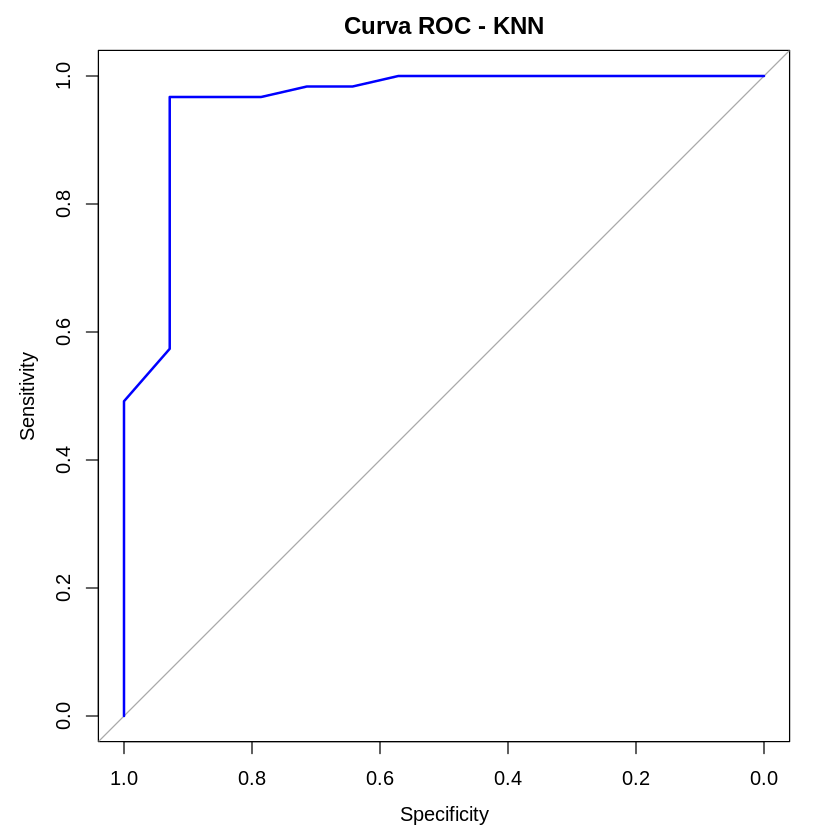

In [16]:
# Usamos el modelo base K = 16
test_pred = knn3(reciberegalo ~. ,  data=test_data, k = 16)
predmod <- predict(test_pred, test_data, type = "prob")

umbrales <- c(1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0)
for (umbral in umbrales) {
  pronknn<-ifelse(predmod[,2] > umbral ,1, 0)
  pronknn <- factor(pronknn, levels = levels(test_data$reciberegalo))
  cat("Resultados para umbral de probabilidad =", umbral, ":\n")
  conf <- confusionMatrix(pronknn, test_data$reciberegalo)
  print(conf$table)
}

library(pROC)
roc_curve <- roc(as.numeric(test_data$reciberegalo == 0), predmod[,2])
plot(roc_curve, col = "blue", main = "Curva ROC - KNN")
auc_value <- auc(roc_curve)
cat("AUC =", auc_value, "\n")